# Project 3 Part B. Linear Regression analysis

In this part of the project, you need to individually (not in pairs):
* obtain data which is appropriate for a Linear Regression analysis, and
* build your own Jupyter notebook undertaking that analysis (using the sort of code seen in class) and describing your conclusions (using appropriate markdown syntax).

Your submission should include the Jupyter notebook, as well as the data, so that the notebook can be effectively compiled by the grader. Below is a suggestion for the structure of your submission.

In [1]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
import math
import random
import scipy.stats as st
from datascience import *

# These lines set up the plotting functionality and formatting.
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## 1. The data 

You will need to find some data which is appropriate or a Linear Regression analysis.

The first section of your notebook should introduce the data: where does it come from, who are the cases, what are the variables (units?), how was the data obtained, etc. You should also indicate what you know about the sampling procedure, what population it is meant to be representing, and any evidence you have for it being a good sample.

Your data should be appropriately cited so that the grader can retrieve the original data if they try to do so.

In [2]:
table = Table.read_table('education-and-mortality.csv')
table

Mortality,Education
921.87,11.4
997.87,11
962.35,9.8
982.29,11.1
1071.29,9.6
1030.38,10.2
934.7,12.1
899.53,10.6
1001.9,10.5
912.35,10.7


## 2. The scatterplot

The second part of the notebook shows the scatterplot of the data and describes its essential features, such as shape, strength and direction. (Note that as the data should be appropriate for a linear regression analysis, it better be linear.) Be sure to provide a sentence interpreting in simple language the relationship between the variables.

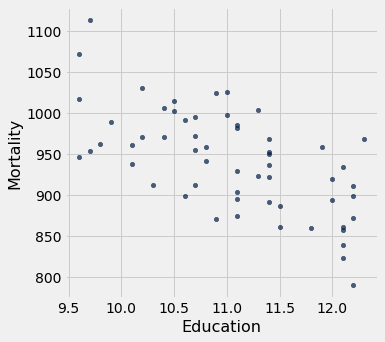

In [25]:
table.scatter('Education')

we can see that there is a linear relationship between the two variables, "Education", and "Mortality", because the data points appear in a declining slope

## 3. The linear regression model

The next part of the notebook describes the linear regression model. Show the line of best fit, and find and interpret:
* the slope and the $y$-intercept, (don't forget units, in each case) and
* the $R^2$- value of the model.

Write down the equation of the linear regression model, giving an appropriate domain for the model, and make a prediction example to correctly show its use.

In [26]:
# Measuring in Standard Units
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.mean(x))/np.std(x)

In [27]:
std_unit_table = Table().with_columns(
    "Mortality SU", standard_units(table.column("Mortality")),
    "Education SU", standard_units(table.column("Education"))
)
std_unit_table

Mortality SU,Education SU
-0.336481,0.466866
0.903049,-0.0416453
0.323732,-1.56718
0.648945,0.0854825
2.1005,-1.82144
1.43327,-1.05867
-0.127229,1.35676
-0.700838,-0.550157
0.968777,-0.677285
-0.491749,-0.423029


In [28]:
tbl_product = std_unit_table.with_column('Product of SU', std_unit_table.column('Mortality SU') * std_unit_table.column('Education SU'))
tbl_product

Mortality SU,Education SU,Product of SU
-0.336481,0.466866,-0.157092
0.903049,-0.0416453,-0.0376078
0.323732,-1.56718,-0.507346
0.648945,0.0854825,0.0554735
2.1005,-1.82144,-3.82593
1.43327,-1.05867,-1.51736
-0.127229,1.35676,-0.172619
-0.700838,-0.550157,0.385571
0.968777,-0.677285,-0.656138
-0.491749,-0.423029,0.208024


In [29]:
r = np.mean(tbl_product.column('Product of SU'))
r

-0.6404407050277293

In [30]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))
correlation(table, "Education", "Mortality")

-0.6404407050277293

the correlation of 0.75 (which is quite close to 1) shows that there is a strong relation between the mortality rate and the education rate

In [31]:
def slope(t, x, y):
    r = correlation(t, x, y)
    return r*np.std(t.column(y))/np.std(t.column(x))
slope(table, "Education", "Mortality")

-49.92018746186626

In [32]:
def intercept(t, x, y):
    return np.mean(t.column(y)) - slope(t, x, y)*np.mean(t.column(x))
intercept(table, "Education", "Mortality")

1493.2582406353145

The equation of the line of best fit is: y = mx + b
mortality = 0.00958*education - 300.29

In [33]:
r**2

0.410164296656415

## 4. Conditions for linear regression

Check that the conditions that ensure the assumptions behind the linear regression model are met. Show the steps that you made.

There are four assumptions associated with a linear regression model: Linearity, Homoscedasticity, Independence, Normality.

Linearity: The relationship between Education and the mean of Mortality is linear.
Homoscedasticity: The variance of residual is the same for any value of Education.
Independence: Observations are independent of each other.
Normality: For any fixed value of Education, Mortality is normally distributed

In [34]:
def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plots.plot(table.column(x), fit(table, x, y), lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'Residuals', residual(table, x, y)
        )
    t.scatter(x, 'Residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')
    
def regression_diagnostic_plots(table, x, y):
    scatter_fit(table, x, y)
    residual_plot(table, x, y)

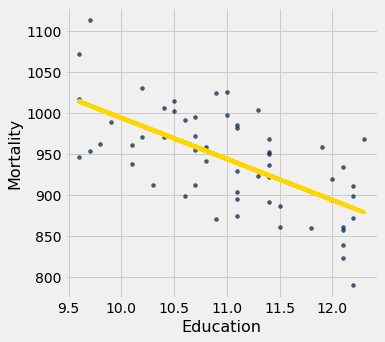

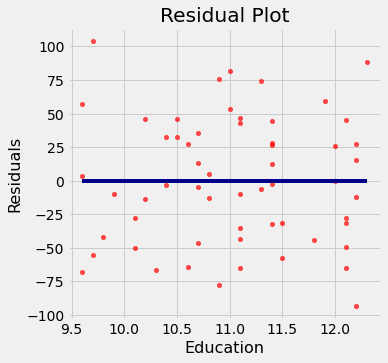

In [35]:
regression_diagnostic_plots(table, "Education", "Mortality")

In [36]:
tbl_fit = table.with_column("Fitted", fit(table, "Education", "Mortality"))
tbl_fit

Mortality,Education,Fitted
921.87,11.4,924.168
997.87,11,944.136
962.35,9.8,1004.04
982.29,11.1,939.144
1071.29,9.6,1014.02
1030.38,10.2,984.072
934.7,12.1,889.224
899.53,10.6,964.104
1001.9,10.5,969.096
912.35,10.7,959.112


In [37]:
tbl_residual = tbl_fit.with_column("Residuals", tbl_fit.column("Mortality") - tbl_fit.column("Fitted"))
tbl_residual

Mortality,Education,Fitted,Residuals
921.87,11.4,924.168,-2.2981
997.87,11,944.136,53.7338
962.35,9.8,1004.04,-41.6904
982.29,11.1,939.144,43.1458
1071.29,9.6,1014.02,57.2656
1030.38,10.2,984.072,46.3077
934.7,12.1,889.224,45.476
899.53,10.6,964.104,-64.5743
1001.9,10.5,969.096,32.8037
912.35,10.7,959.112,-46.7622


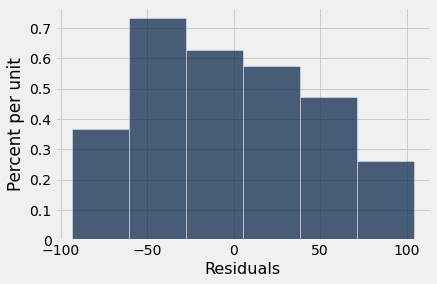

In [46]:
tbl_residual.hist("Residuals", bins = 6)

In [55]:
arr = tbl_residual.column("Residuals")
std_dev = np.sqrt((sum((arr - np.mean(arr))**2))/(len(arr)-1))
std_dev

47.500540238666446


## 5. Confidence interval for the slope

(Using bootstrapping on the sample) find a confidence interval for the slope, and write a sentence interpreting this confidence interval in context. 

Use this confidence interval to make a hypothesis test where the alternative hypothesis is that there is a non-trivial linear relationship between the variables you are looking at. (Since your data was chosen to show a linear relationship, I expect that you will reject the null hypothesis here - but you better do so for the right reasons :) ).

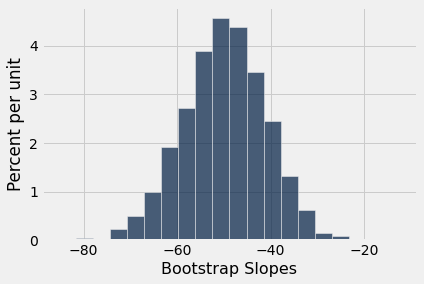

In [39]:
slopes = make_array()
for i in np.arange(5000):
    bootstrap_sample = table.sample()
    bootstrap_slope = slope(bootstrap_sample, "Education", "Mortality")
    slopes = np.append(slopes, bootstrap_slope)
Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)

In [40]:
left = percentile(2.5, slopes)
right = percentile(97.5, slopes)
left, right

(-67.77956631997945, -33.4378045325779)

Slope of regression line: -49.92018746186626
Approximate 95%-confidence interval for the slope of the true line:
-67.76910434319865 -33.25909964466427


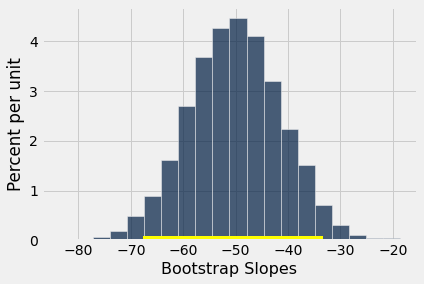

In [41]:
def bootstrap_slope(table, x, y, repetitions):
    
    #For each repetition:
    # Bootstrap the scatter, get the slope of the regression line, 
    #augment the list of generated slopes
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(table, x, y)
    
    # Display results
    Table().with_column("Bootstrap Slopes", slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print("Slope of regression line:", observed_slope)
    print("Approximate 95%-confidence interval for the slope of the true line:")
    print(left, right)
    
bootstrap_slope(table, "Education", "Mortality", 5000)

## 6. Confidence interval for a prediction. 

Choose two $x$-values to make predictions using your linear regression model - one near the $x$-mean, and the other far from the mean (but in both cases, within the domain of the model).

(Again using bootstrapping) find a 95% confidence interval for the prediction in each case, and write a sentence interpreting the interval in the context of your data, the variables and their units.

How would it be different if you were to give an interval in which you would find 95% of individual $y$-values for either of these two $x$-values?

In [42]:
def fitted_value(table, x, y, given_x):    
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * given_x + b

fitted_value(table, "Education", "Mortality", 97)

-3348.999943165713

In [43]:
#Boostrap prediction of variable y  at new_x
#Data contained in table; prediction by regression of y based on x
#repetitions = number of bootstrap replications of the original scatter plot.

def bootstrap_prediction(table, x, y, new_x, repetitions):
    
    #For each repetition
    #Bootstrap the scatter, 
    #get the regression prediction at new_x,
    #augment the predictions list
    
    predictions = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample()
        bootstrap_prediction = fitted_value(bootstrap_sample, x, y, new_x)
        predictions = np.append(predictions, bootstrap_prediction)

    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)

    #Prediction based on original sample
    original = fitted_value(table, x, y, new_x)
    
    # Display results
    Table().with_column("Prediction", predictions).hist(bins=20)
    plots.xlabel("predictions at x="+str(new_x))
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print("Height of regression line at x=" +str(new_x)+":", original)
    print("Approximate 95%-confidence interval for height of true line:")
    print(left, right) 

Height of regression line at x=10.5: 969.0962722857187
Approximate 95%-confidence interval for height of true line:
954.2768003366948 985.5344053102483


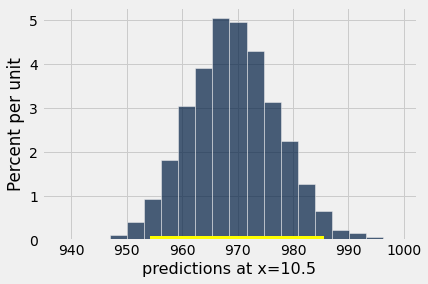

In [47]:
bootstrap_prediction(table, "Education", "Mortality", 10.5, 5000)

Height of regression line at x=8: 1093.8967409403845
Approximate 95%-confidence interval for height of true line:
1041.7361401493395 1150.301494946592


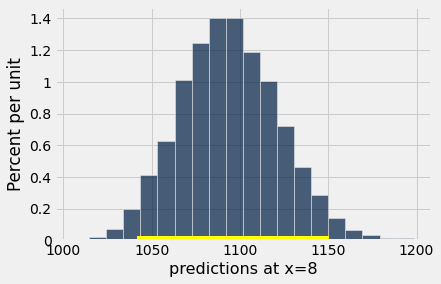

In [48]:
bootstrap_prediction(table, "Education", "Mortality", 8, 5000)

## 7. Conclusions

Write a short paragraph describing what your analysis of the data found. 

after this analysis we can clearly see that there is a link between education rate and mortality rates in the US